<a href="https://colab.research.google.com/github/itsstephxc/Dashboards/blob/main/%22Project_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setting Up My Enviroment**

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [35]:
# Setting the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

In [37]:
# Pretty Display of variables.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

## **Importing the Dataset**

In [39]:
# Import Data
url = "https://raw.githubusercontent.com/itsstephxc/Special-Topic-DA/main/baseball.csv"
df = pd.read_csv(url)

# Quick glance of the data and its characteristics
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


## **Structural Analysis**

In [40]:
# Checking the shape of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Getting a summary of the statistics of the numerical variables in the dataset
print(df.describe())

# Checking the data types of the columns
print(df.dtypes)

# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

# Checking for missing values
print(df.isnull().sum())

# Checking for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Checking the structure of the dataset
print(df.head())
print(df.tail())


Number of rows: 1232
Number of columns: 15
              Year           RS           RA            W          OBP  \
count  1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean   1988.957792   715.081981   715.081981    80.904221     0.326331   
std      14.819625    91.534294    93.079933    11.458139     0.015013   
min    1962.000000   463.000000   472.000000    40.000000     0.277000   
25%    1976.750000   652.000000   649.750000    73.000000     0.317000   
50%    1989.000000   711.000000   709.000000    81.000000     0.326000   
75%    2002.000000   775.000000   774.250000    89.000000     0.337000   
max    2012.000000  1009.000000  1103.000000   116.000000     0.373000   

               SLG           BA     Playoffs  RankSeason  RankPlayoffs  \
count  1232.000000  1232.000000  1232.000000  244.000000    244.000000   
mean      0.397342     0.259273     0.198052    3.122951      2.717213   
std       0.033267     0.012907     0.398693    1.738349      1.0952

float64    7
int64      6
object     2
dtype: int64

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64
Number of duplicates: 0
  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2           4.0  162  0.315  0.403  
3           NaN  162  0.331  0.428

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, 'Playoffs'),
 Text(0, 0, 'RankPlayoffs'),
 Text(0, 0, 'RankSeason'),
 Text(0, 0, 'G'),
 Text(0, 0, 'Year'),
 Text(0, 0, 'W'),
 Text(0, 0, 'OOBP'),
 Text(0, 0, 'BA'),
 Text(0, 0, 'OBP'),
 Text(0, 0, 'OSLG'),
 Text(0, 0, 'SLG'),
 Text(0, 0, 'RS'),
 Text(0, 0, 'RA')]

Text(0.5, 1.0, 'Unique values per frequency')

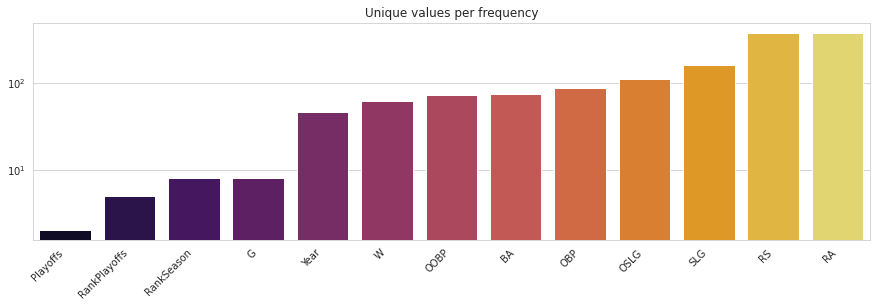

In [41]:
# Evaluation of Numeric Features
# 2 unique values: binary
# 3 to ~ 10 unique values: ordinal (cat)
# 10+ unique values continuous
 # For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

## **Quality Analysis**

In [42]:
%time
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=['Team'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
You seem to have 0 duplicates in your database.


In [43]:
#  Extract column names of all features, except 'Accident_Index'
# you may want to remove the target as well
columns_to_consider = df.drop(labels=['Team'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

(1232, 15)

<Figure size 1080x576 with 0 Axes>

Text(0.5, 51.0, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

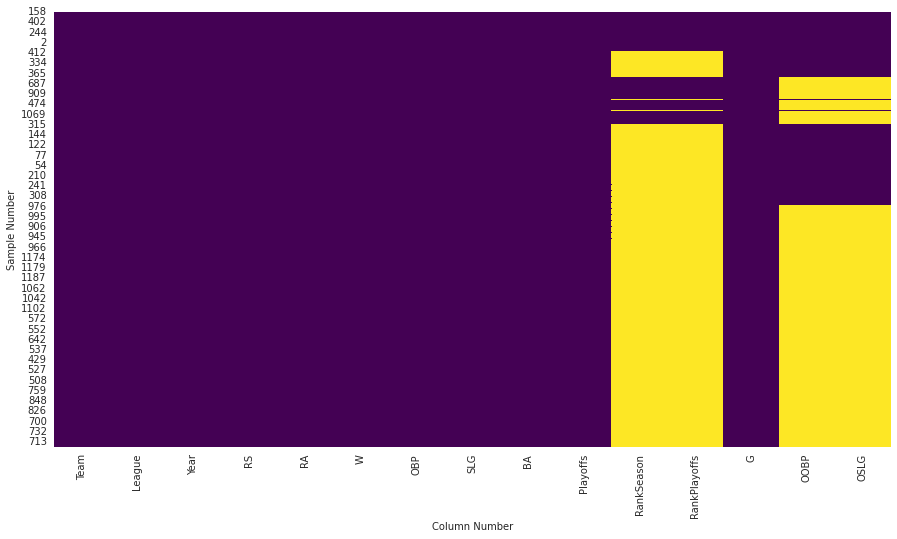

In [44]:
# Missing Values (per sample/row)
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

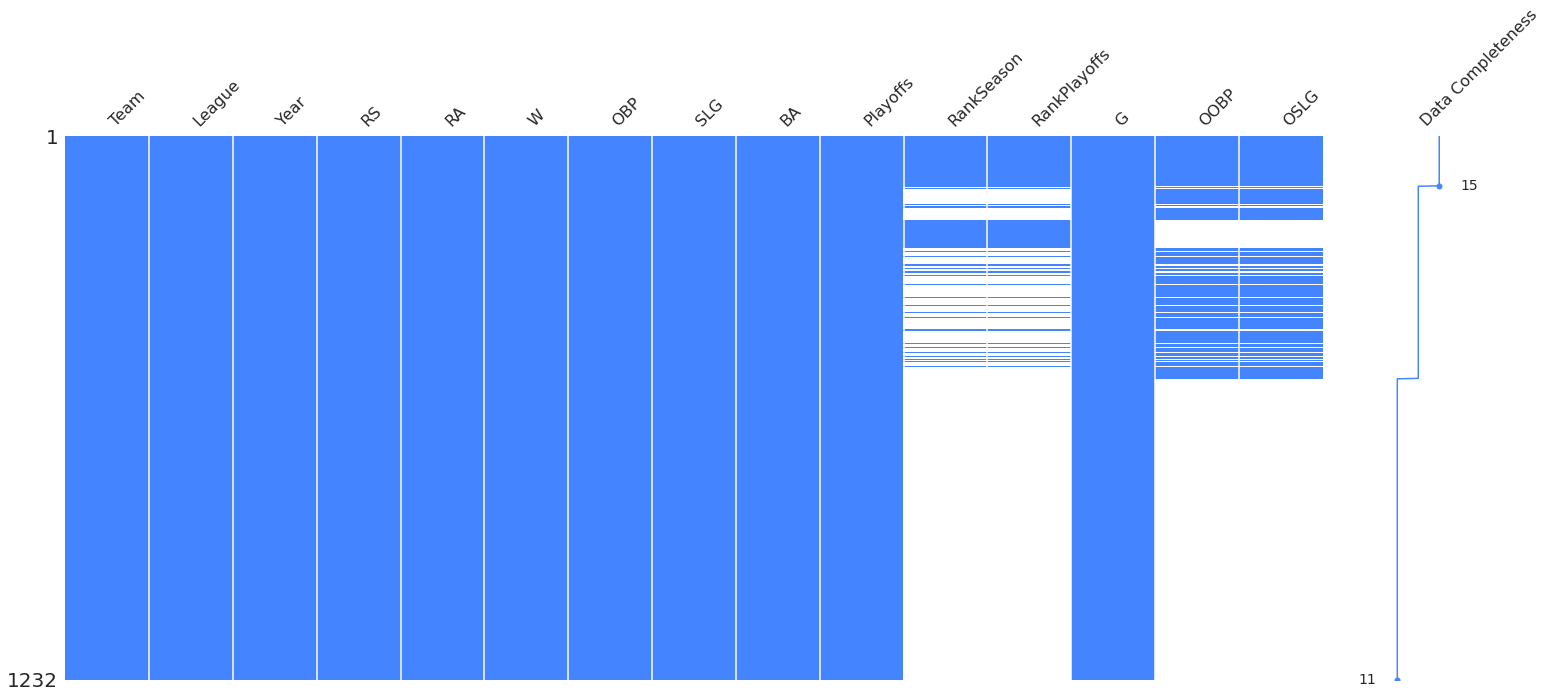

In [46]:
# This figure shows on the y-axis each of the individual samples, and on the x-axis if any of the features contains a missing value.
# While this is already a useful plot, an even better approach is to use the missingno library, to get a plot like this one:
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [48]:
# Drop rows that are 20% or more empty (you set the threshold)
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(550, 15)

<Figure size 1080x576 with 0 Axes>

Text(0.5, 51.0, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

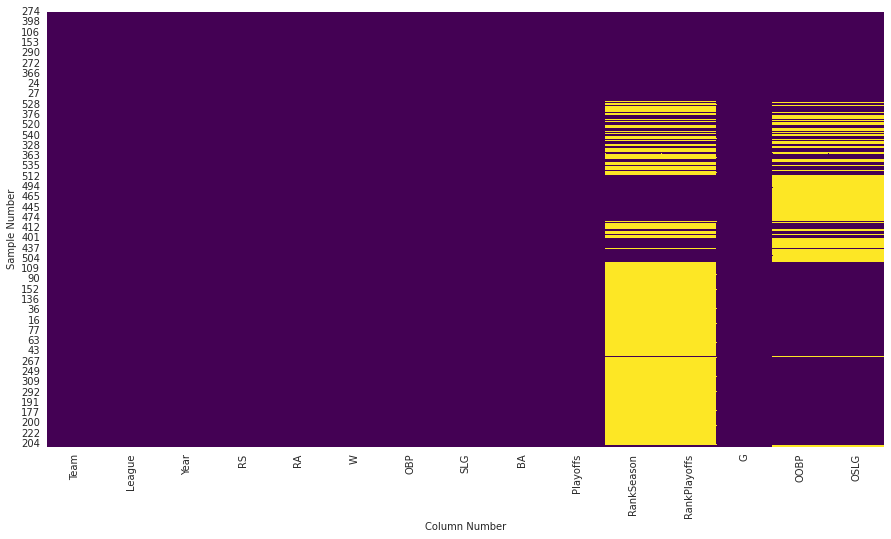

In [50]:
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

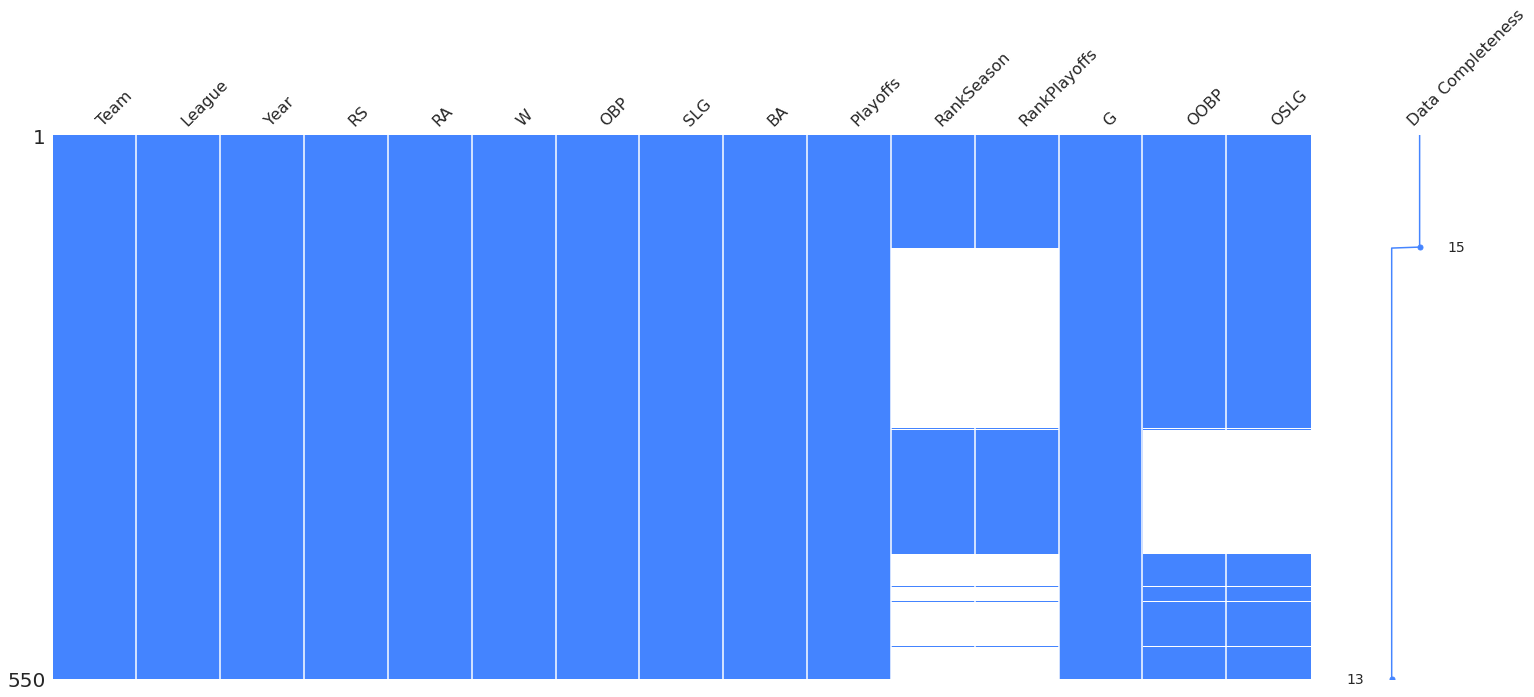

In [51]:
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

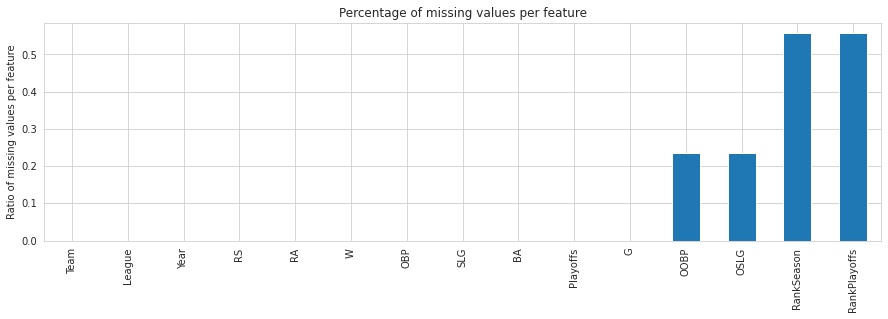

In [52]:
# Per Feature / column
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [53]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(550, 11)

CPU times: user 108 ms, sys: 24.3 ms, total: 132 ms
Wall time: 166 ms


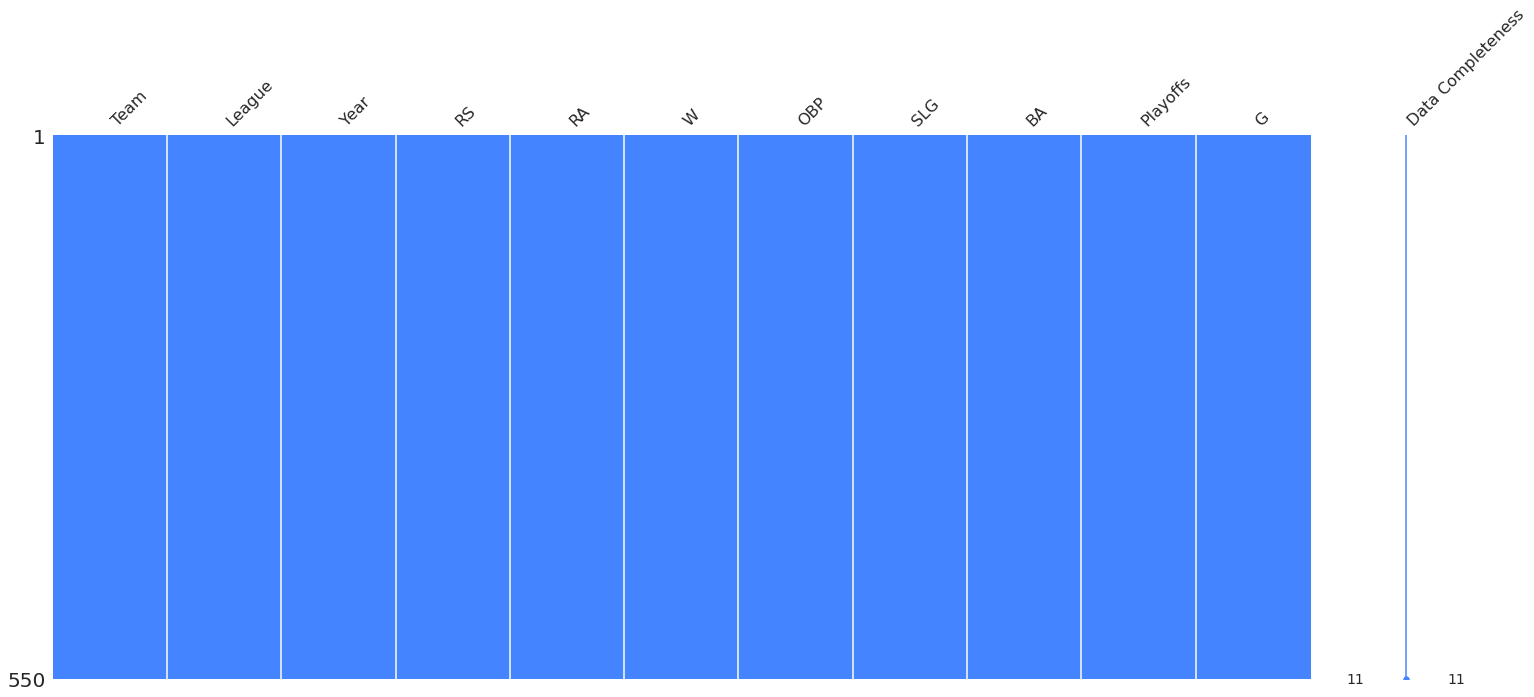

In [54]:
%%time
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

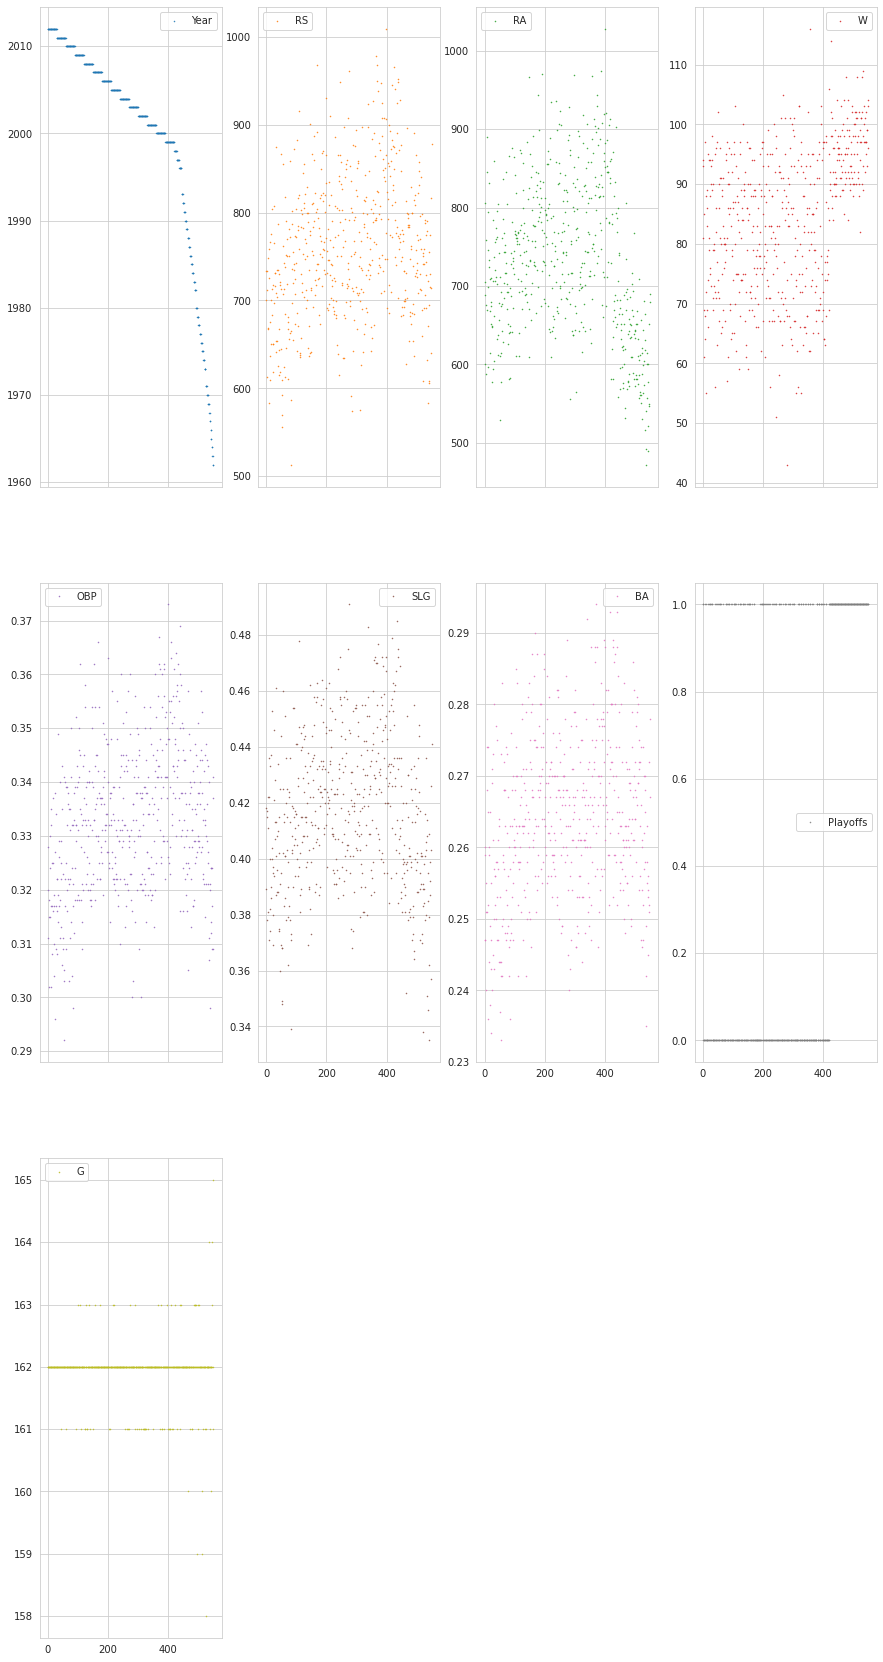

In [55]:
# Plot all numeric features:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [56]:
# Investigate Categorical Features
# Extract descriptive properties of categorical features
df.describe(exclude=["number", "datetime"])

,Team,League
count,550,550
unique,35,2
top,LAD,NL
freq,24,289


CPU times: user 629 ms, sys: 129 ms, total: 758 ms
Wall time: 652 ms


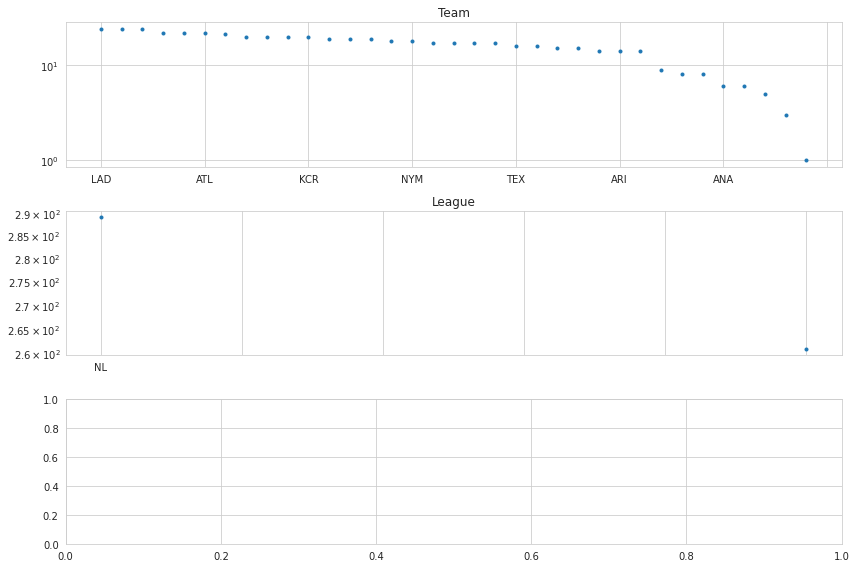

In [57]:
%%time
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();